# Test heating correlations
## Brandis and Johnston

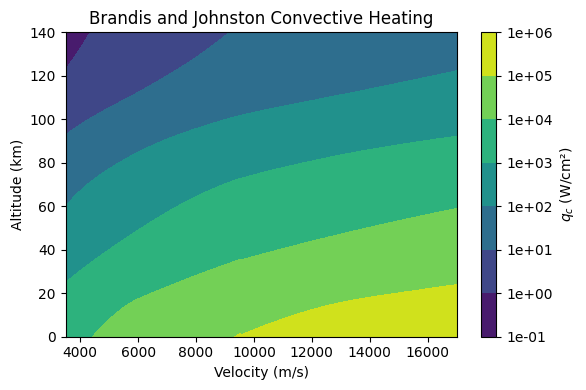

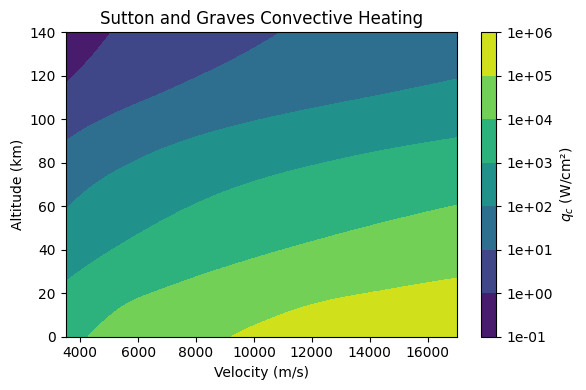

/tmp/ipykernel_1126557/1259654383.py:65: UserWarning: Log scale: values of z <= 0 have been masked
  contour = plt.contourf(V, H, q_r.T, levels=50, norm=colors.LogNorm())


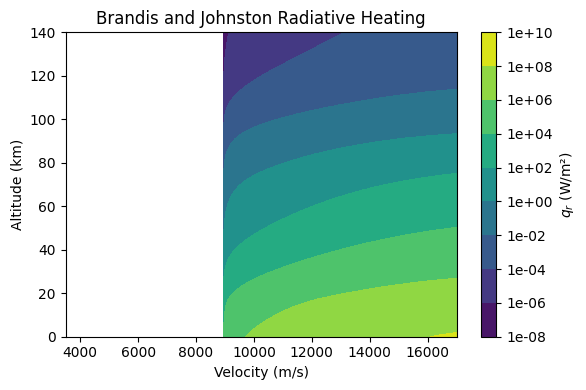

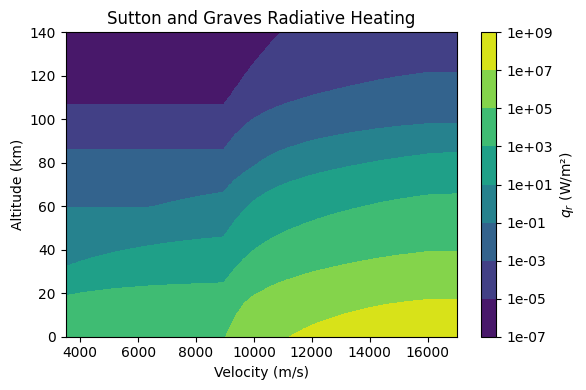

In [11]:
import numpy as np
import importlib
import physics_utils.fluids.stag_heating_coor as stag_heating_coor
#from stag_heating_coor import bj_conv_heating , bj_rad_heating
from physics_utils.freestream_conditions.monaco_faster_5sp.calc_inflow_mass_fun import calc_inflow_mass_5sp
from physics_utils.constants import AVOGADRO
from physics_utils.spec_props import M_N2, M_O2, M_N, M_O
import matplotlib.pyplot as plt
import matplotlib.colors as colors

importlib.reload(stag_heating_coor)

#v = np.linspace(2e3,18e3, 100)
v = np.linspace(3500, 17000, 100)
h = np.linspace(0, 140, 100)
rn = 0.025 # m, nose radius

q_c = np.zeros([np.size(v), np.size(h)])
q_c_sg = np.zeros([np.size(v), np.size(h)])
q_r = np.zeros([np.size(v), np.size(h)])
q_r_sg = np.zeros([np.size(v), np.size(h)])

h_ind = 0
for alt in h:
    freestream = calc_inflow_mass_5sp(alt)
    # to find density of inflow, (part/m^3)*(mol/part)*(kg/mol) = n/nAvo*m
    molar_masses = np.array([M_N2, M_O2, M_N, M_O])/1000
    rho = np.sum(np.array(freestream[1:])/AVOGADRO*molar_masses)  

    v_ind = 0
    for vel in v:   

        q_c[v_ind, h_ind] = stag_heating_coor.bj_conv_heating(rho, vel, rn)/100**2
        q_c_sg[v_ind, h_ind] = stag_heating_coor.sg_conv_heating(rho, vel, rn)/100**2
        q_r[v_ind, h_ind] = stag_heating_coor.bj_rad_heating(rho, vel, rn)/100**2
        q_r_sg[v_ind, h_ind] = stag_heating_coor.sg_rad_heating(rho, vel, rn)/100**2
        v_ind += 1

    h_ind += 1

# plot all this shit
V, H = np.meshgrid(v, h)

plt.figure(figsize=(6, 4))
contour = plt.contourf(V, H, q_c.T, levels=50, norm=colors.LogNorm())
plt.xlabel("Velocity (m/s)")
plt.ylabel("Altitude (km)")
plt.title("Brandis and Johnston Convective Heating")
plt.colorbar(contour, label="$q_c$ (W/cm²)", format='%.0e')
plt.tight_layout()
plt.savefig("qc_bj.png")
plt.show()

plt.figure(figsize=(6, 4))
contour = plt.contourf(V, H, q_c_sg.T, levels=50, norm=colors.LogNorm())
plt.xlabel("Velocity (m/s)")
plt.ylabel("Altitude (km)")
plt.title("Sutton and Graves Convective Heating")
plt.colorbar(contour, label="$q_c$ (W/cm²)", format='%.0e')
plt.tight_layout()
plt.savefig("qc_sg.png")
plt.show()

plt.figure(figsize=(6, 4))
contour = plt.contourf(V, H, q_r.T, levels=50, norm=colors.LogNorm())
plt.xlabel("Velocity (m/s)")
plt.ylabel("Altitude (km)")
plt.title("Brandis and Johnston Radiative Heating")
plt.colorbar(contour, label="$q_r$ (W/m²)", format='%.0e')
plt.tight_layout()
plt.savefig("qr_bj.png")
plt.show()

plt.figure(figsize=(6, 4))
contour = plt.contourf(V, H, q_r_sg.T, levels=50, norm=colors.LogNorm())
plt.xlabel("Velocity (m/s)")
plt.ylabel("Altitude (km)")
plt.title("Sutton and Graves Radiative Heating")
plt.colorbar(contour, label="$q_r$ (W/m²)", format='%.0e')
plt.tight_layout()
plt.savefig("qr_sg.png")
plt.show()